In [137]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

FILES_DIR = os.path.abspath('images')

In [138]:
def showHistogram(imageName, imageDir = 'normal', type = 'Normal'):
    image = Image.open(f'{FILES_DIR}/{imageDir}/{imageName}').convert('L')
    histogram = image.histogram()

    plt.figure()
    plt.title(f'Histograma da {imageName} [{type}]')
    plt.xlabel("Nível de Cinza")
    plt.ylabel("Número de Pixels")
    plt.plot(histogram, color = 'black')
    plt.xlim([0, 255])

    imageName = imageName.split('.')
    imageName = imageName[0] + f'_{imageDir}_histogram.png'

    plt.savefig(f'{FILES_DIR}/histograms/{imageName}')
    plt.show()

def equalizeHistogram(imageName):
    image = Image.open(f'{FILES_DIR}/normal/{imageName}').convert('L')
    histogram = image.histogram()

    grayProb = [i / sum(histogram) for i in histogram]
    grayAcumProb = [sum(grayProb[:i + 1]) for i in range(len(grayProb))]
    
    equalizedGray = [int(round(i * 255)) for i in grayAcumProb]

    image = np.asarray(image).astype(np.uint8)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            image[y, x] = equalizedGray[image[y, x]]

    image = Image.fromarray(image)
    image.save(f'{FILES_DIR}/equalized/{imageName}')
    image.show()

    showHistogram(imageName, 'equalized', 'Equalizada')

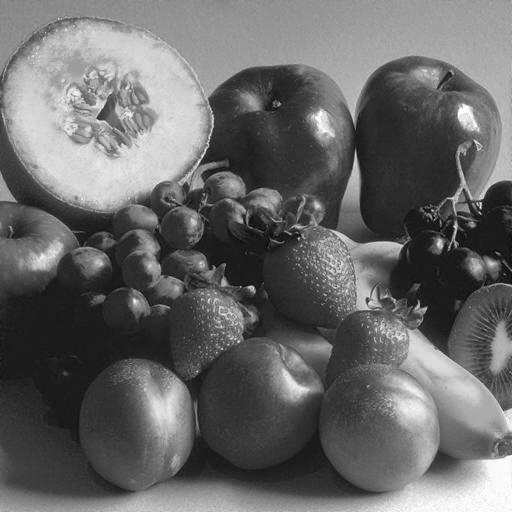

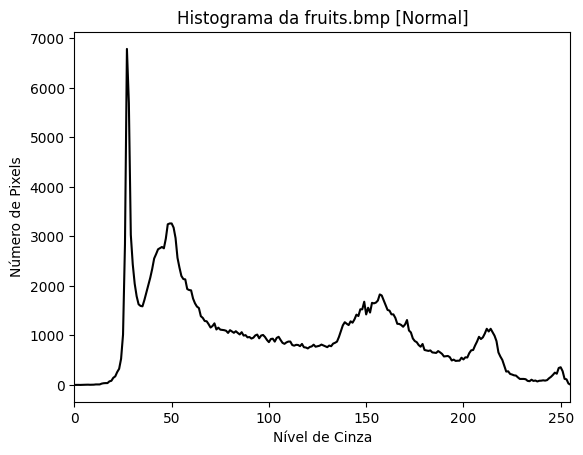

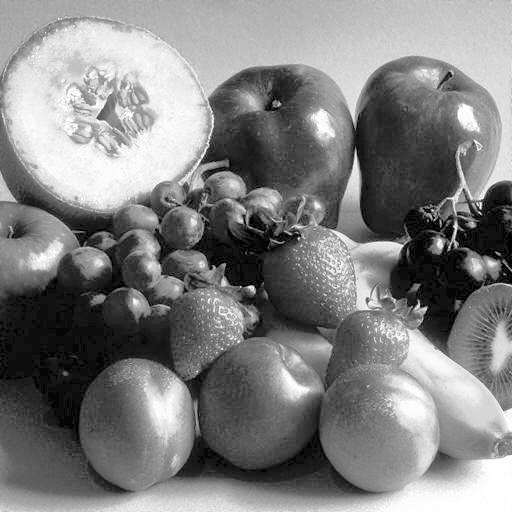

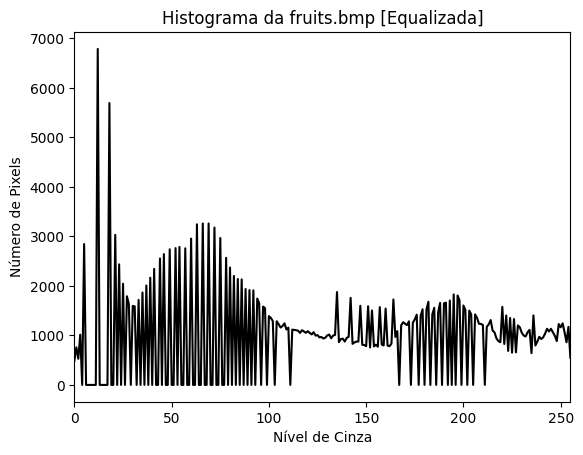

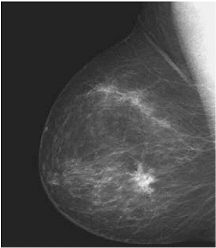

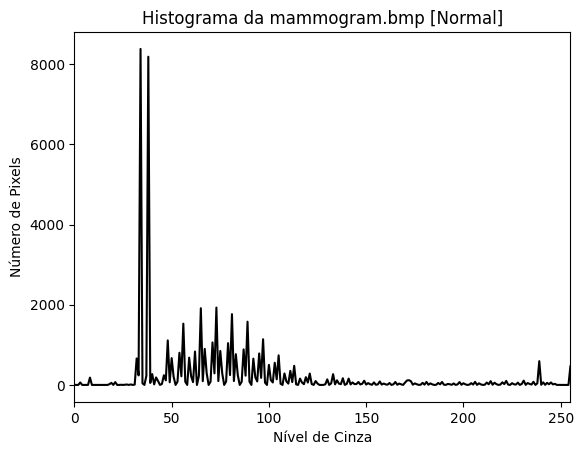

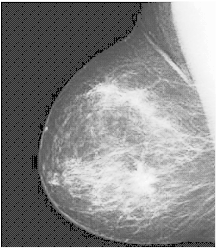

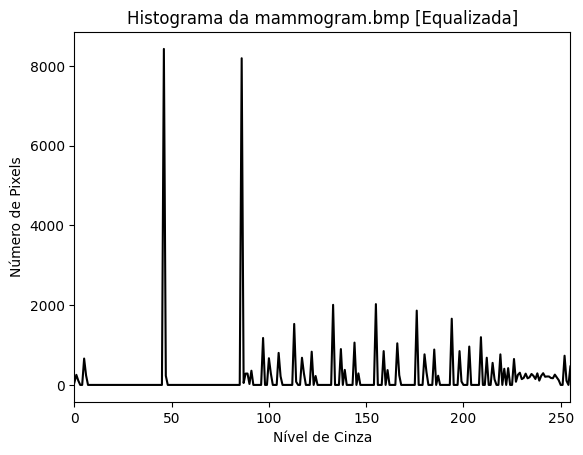

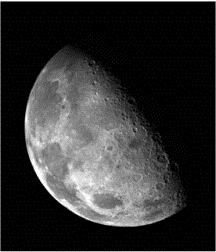

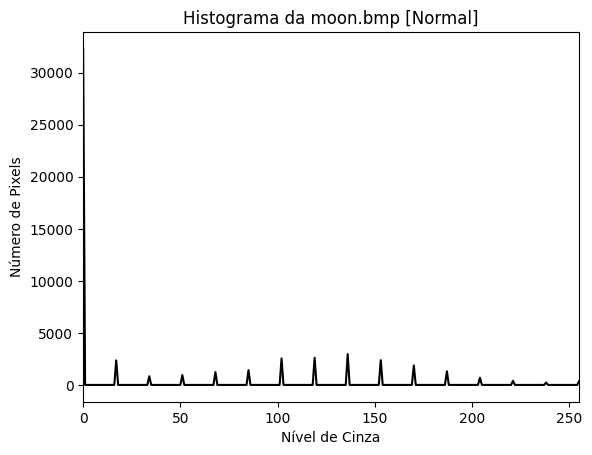

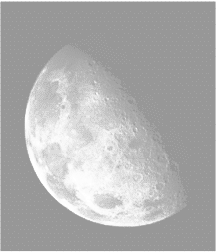

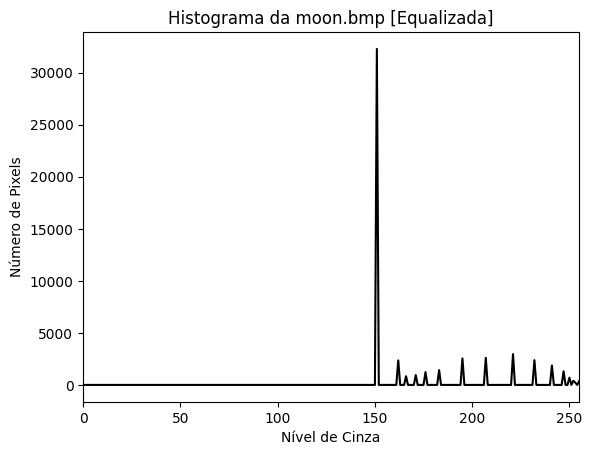

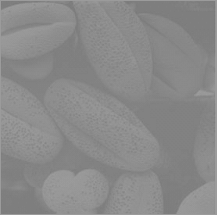

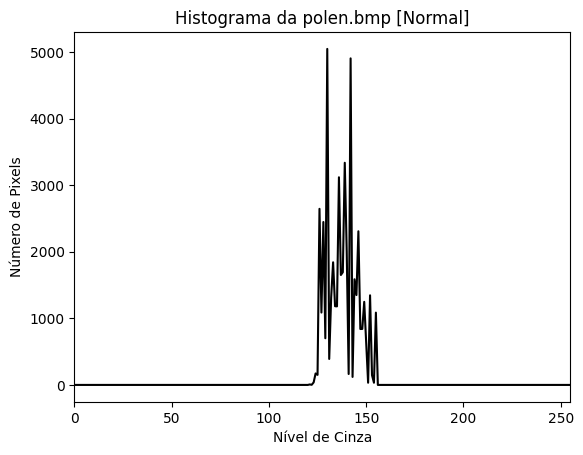

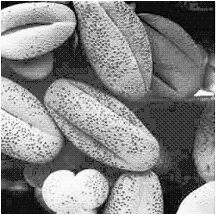

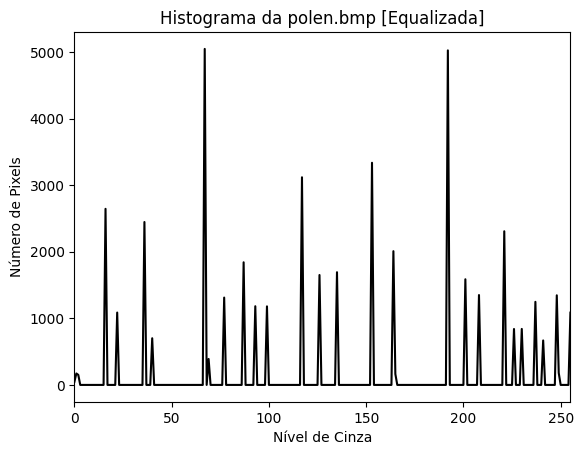

In [139]:
os.makedirs(f'{FILES_DIR}/equalized/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/histograms/', exist_ok = True)
os.makedirs(f'{FILES_DIR}/normal/', exist_ok = True)

images = [
    'fruits.bmp',
    'mammogram.bmp',
    'moon.bmp',
    'polen.bmp'
]

for imageName in images:
    image = Image.open(f'{FILES_DIR}/normal/{imageName}').convert('L')
    image.show()

    showHistogram(imageName)
    equalizeHistogram(imageName)